In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "red-wine-quality-cortez-et-al-2009" "wine-quality-localdataset"

In [2]:
wine.data <-  read.csv("/kaggle/input/wine-quality-localdataset/winequality-white.csv", sep = ";")

# Basic Data Exploration

In [20]:
head(wine.data) 

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [32]:
sapply(wine.data, class)

fixed.acidity     volatile.acidity          citric.acid 
           "numeric"            "numeric"            "numeric" 
      residual.sugar            chlorides  free.sulfur.dioxide 
           "numeric"            "numeric"            "numeric" 
total.sulfur.dioxide              density                   pH 
           "numeric"            "numeric"            "numeric" 
           sulphates              alcohol              quality 
           "numeric"            "numeric"            "integer"

In [21]:
sample(wine.data,replace=FALSE) %>% head()

,alcohol,sulphates,citric.acid,volatile.acidity,total.sulfur.dioxide,chlorides,residual.sugar,quality,fixed.acidity,free.sulfur.dioxide,density,pH
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.8,0.45,0.36,0.27,170,0.045,20.7,6,7.0,45,1.0010,3.00
2,9.5,0.49,0.34,0.30,132,0.049,1.6,6,6.3,14,0.9940,3.30
3,10.1,0.44,0.40,0.28,97,0.050,6.9,6,8.1,30,0.9951,3.26
4,9.9,0.40,0.32,0.23,186,0.058,8.5,6,7.2,47,0.9956,3.19
5,9.9,0.40,0.32,0.23,186,0.058,8.5,6,7.2,47,0.9956,3.19
6,10.1,0.44,0.40,0.28,97,0.050,6.9,6,8.1,30,0.9951,3.26


In [22]:
tail(wine.data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
4893,6.5,0.23,0.38,1.3,0.032,29,112,0.99298,3.29,0.54,9.7,5
4894,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2,6
4895,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,5
4896,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
4897,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7
4898,6.0,0.21,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8,6


In [23]:
dim(wine.data)

[1] 4898   12

In [24]:
#structure
str(wine.data)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


# Summary of Dataset

In [26]:
summary(wine.data)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

In [27]:
glimpse(wine.data)

Rows: 4,898
Columns: 12
$ fixed.acidity        <dbl> 7.0, 6.3, 8.1, 7.2, 7.2, 8.1, 6.2, 7.0, 6.3, 8.1,…
$ volatile.acidity     <dbl> 0.27, 0.30, 0.28, 0.23, 0.23, 0.28, 0.32, 0.27, 0…
$ citric.acid          <dbl> 0.36, 0.34, 0.40, 0.32, 0.32, 0.40, 0.16, 0.36, 0…
$ residual.sugar       <dbl> 20.70, 1.60, 6.90, 8.50, 8.50, 6.90, 7.00, 20.70,…
$ chlorides            <dbl> 0.045, 0.049, 0.050, 0.058, 0.058, 0.050, 0.045, …
$ free.sulfur.dioxide  <dbl> 45, 14, 30, 47, 47, 30, 30, 45, 14, 28, 11, 17, 1…
$ total.sulfur.dioxide <dbl> 170, 132, 97, 186, 186, 97, 136, 170, 132, 129, 6…
$ density              <dbl> 1.0010, 0.9940, 0.9951, 0.9956, 0.9956, 0.9951, 0…
$ pH                   <dbl> 3.00, 3.30, 3.26, 3.19, 3.19, 3.26, 3.18, 3.00, 3…
$ sulphates            <dbl> 0.45, 0.49, 0.44, 0.40, 0.40, 0.44, 0.47, 0.45, 0…
$ alcohol              <dbl> 8.8, 9.5, 10.1, 9.9, 9.9, 10.1, 9.6, 8.8, 9.5, 11…
$ quality              <int> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 7, 6…


# Check For Missing or Inconsistent data

In [28]:
wine.data %>% anyNA()

[1] FALSE

In [29]:
sapply(wine.data ,function(x) sum(is.na(x)))

fixed.acidity     volatile.acidity          citric.acid 
                   0                    0                    0 
      residual.sugar            chlorides  free.sulfur.dioxide 
                   0                    0                    0 
total.sulfur.dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0

In [3]:
duplicate.data<-wine.data[duplicated(wine.data) | duplicated(wine.data, fromLast =TRUE),]

number of duplicates count are 1709  so theere are two options either imput them or drop them

In [4]:
wine.data <- wine.data[!duplicated(wine.data),]

In [5]:
dim(wine.data)

[1] 3961   12

In [6]:
nrow(wine.data[duplicated(wine.data) | duplicated(wine.data, fromLast =TRUE),])

[1] 0

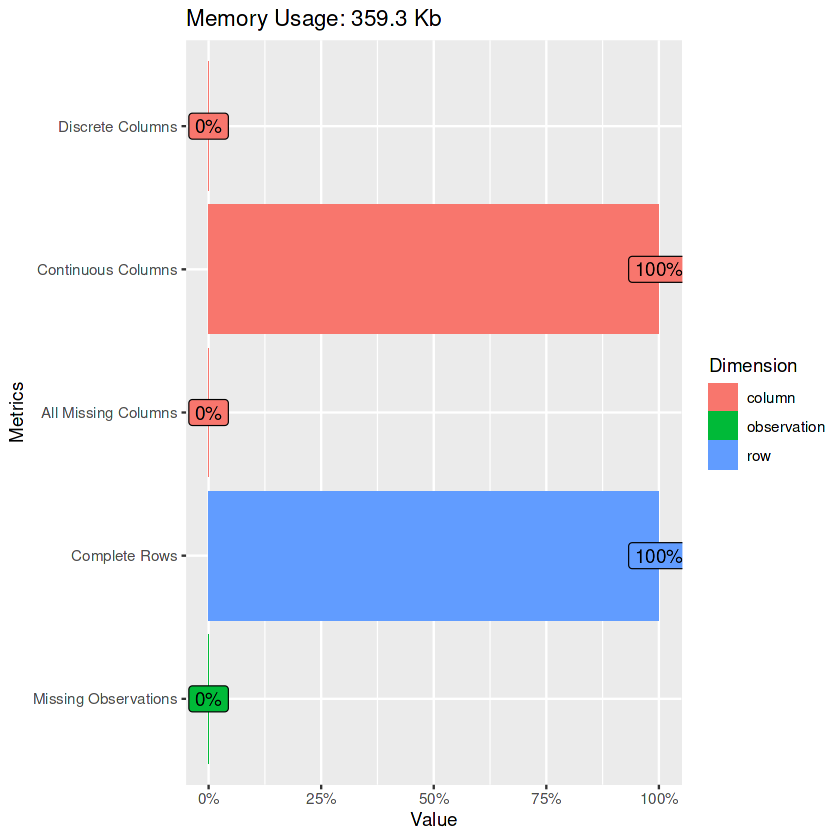

In [8]:
library(DataExplorer)
plot_intro(wine.data)

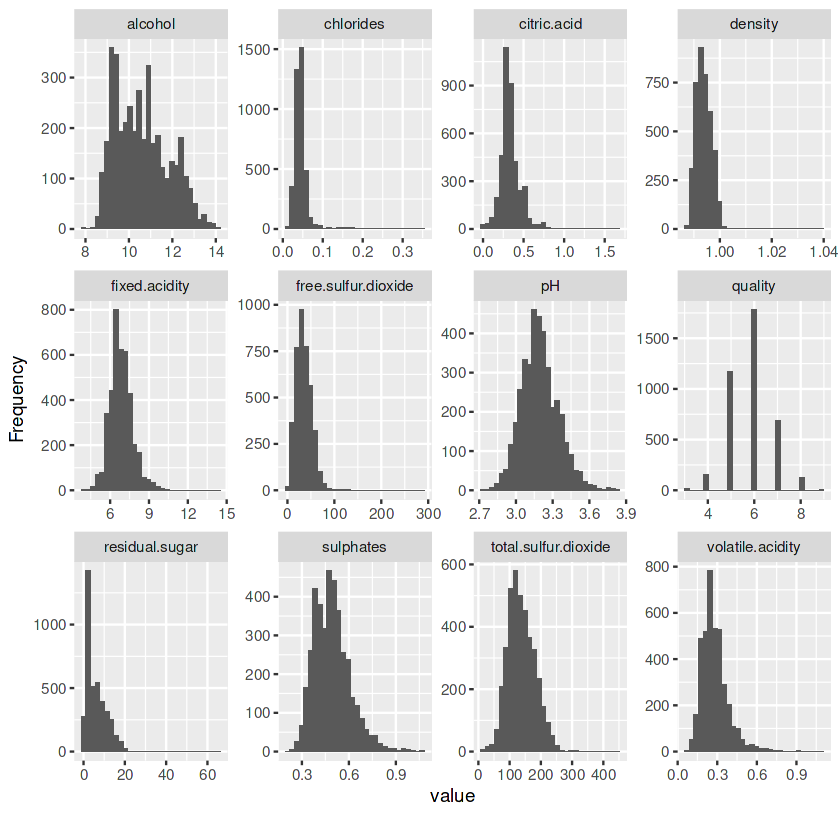

In [60]:
plot_histogram(wine.data)

In [64]:
colnames(wine.data)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

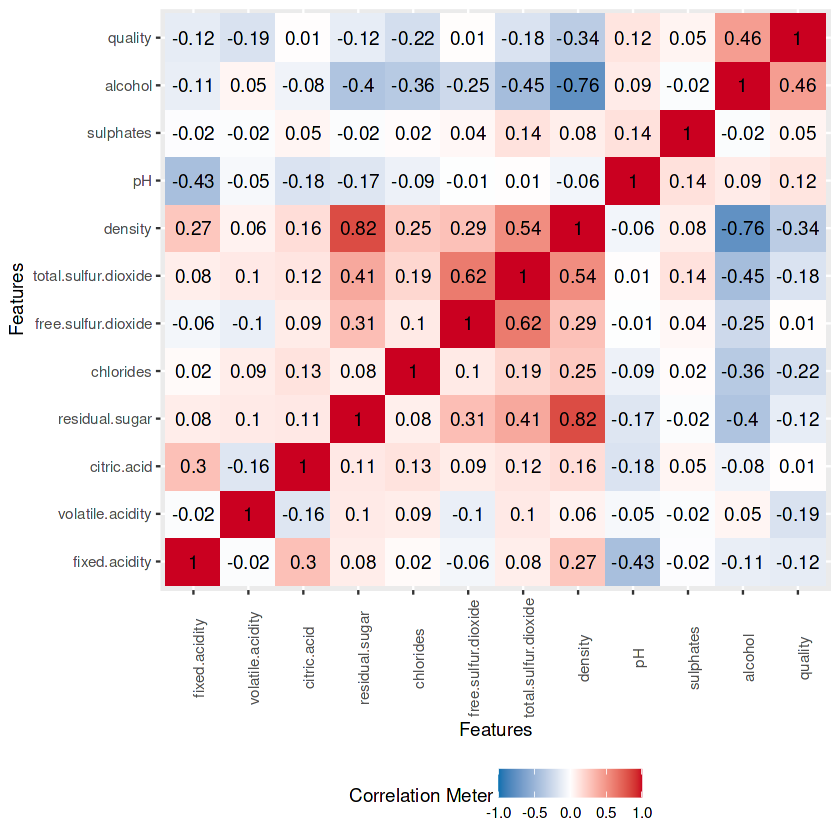

In [75]:
plot_correlation(wine.data)

In [11]:
table(wine.data$quality)


   3    4    5    6    7    8    9 
  20  153 1175 1788  689  131    5 

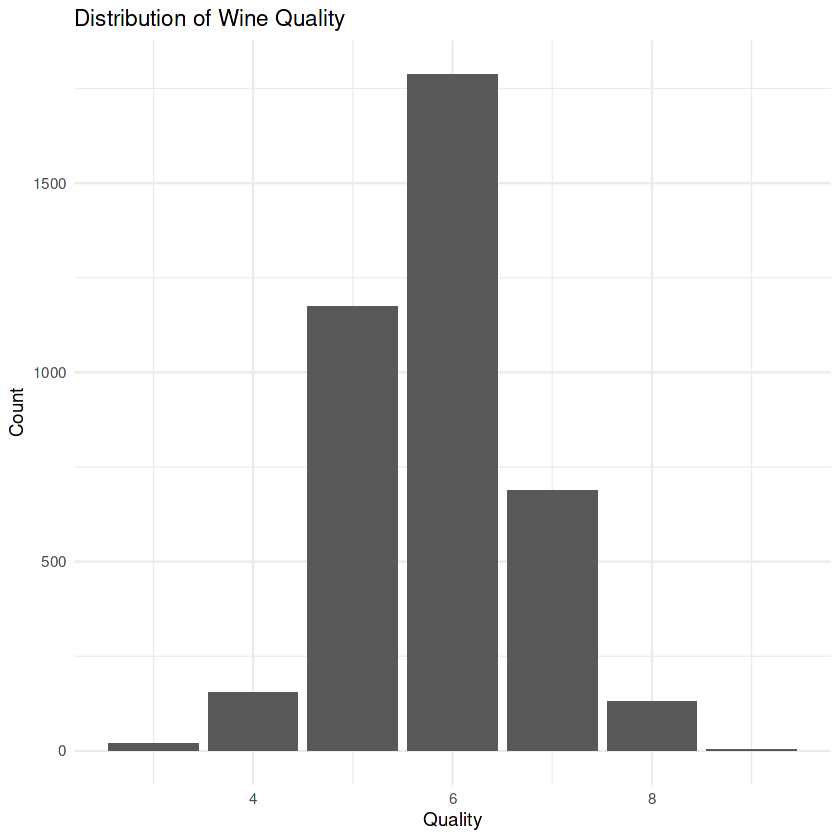

In [15]:
ggplot(wine.data,aes(x=quality))+
    geom_bar()+
    labs(title="Distribution of Wine Quality", x="Quality", y="Count") +
    theme_minimal()

In [16]:
y= wine.data$quality

In [18]:
x=wine.data %>% select(-c("quality"))

In [19]:
head(x)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
7,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6
10,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11.0


In [25]:
length(y)

[1] 3961

In [34]:
x<-sapply(x, function(x) scale(x))

In [35]:
head(x)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0.1853286,-0.101875868,0.2096250,3.0411880,-0.03917611,0.5874967,0.76065846,2.482434779,-1.28976532,-0.355443308,-1.4702101
-0.6221838,0.188155502,0.0462878,-0.8875223,0.13396372,-1.2137795,-0.12041791,0.072460884,0.68983728,-0.003091198,-0.8950613
1.4542766,-0.005198745,0.5362994,0.2026434,0.17724867,-0.2840885,-0.93193561,0.451171068,0.42589027,-0.443531336,-0.4020766
0.4160464,-0.488584361,-0.1170494,0.5317500,0.52352832,0.7037081,1.13163798,0.623312060,-0.03601701,-0.795883446,-0.5664048
-0.7375428,0.381509748,-1.4237469,0.2232126,-0.03917611,-0.2840885,-0.02767303,0.382314671,-0.10200376,-0.179267253,-0.8128972
1.4542766,-0.585261484,0.7813051,-0.9080915,-0.08246107,-0.4002999,-0.18997657,0.003604487,0.16194325,-0.355443308,0.3374004


In [36]:
dim(x)

[1] 3961   11

In [56]:
x<- x%>% select(-c("residual.sugar","density"))

In [59]:
dim(x)
colnames(x)

[1] 3961    9

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
[4] "chlorides"            "free.sulfur.dioxide"  "total.sulfur.dioxide"
[7] "pH"                   "sulphates"            "alcohol"

In [60]:
x<-sapply(x, function(x) scale(x))

In [61]:
head(x)

fixed.acidity,volatile.acidity,citric.acid,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,pH,sulphates,alcohol
0.1853286,-0.101875868,0.2096250,-0.03917611,0.5874967,0.76065846,-1.28976532,-0.355443308,-1.4702101
-0.6221838,0.188155502,0.0462878,0.13396372,-1.2137795,-0.12041791,0.68983728,-0.003091198,-0.8950613
1.4542766,-0.005198745,0.5362994,0.17724867,-0.2840885,-0.93193561,0.42589027,-0.443531336,-0.4020766
0.4160464,-0.488584361,-0.1170494,0.52352832,0.7037081,1.13163798,-0.03601701,-0.795883446,-0.5664048
-0.7375428,0.381509748,-1.4237469,-0.03917611,-0.2840885,-0.02767303,-0.10200376,-0.179267253,-0.8128972
1.4542766,-0.585261484,0.7813051,-0.08246107,-0.4002999,-0.18997657,0.16194325,-0.355443308,0.3374004


In [70]:
names(y)<-c("quality")

In [72]:
head(y)

,quality
,<int>
1,6
2,6
3,6
4,6
5,6
6,6


In [88]:
set.seed(123)


n_train <- round(nrow(x) * 0.8)
n_test <- nrow(x) - n_train


train_indices <- sample(seq_len(nrow(x)), size = n_train, replace = FALSE)


train_x <- x[train_indices, ]
test_x <- x[-train_indices, ]
train_y <- y[train_indices,]
test_y <- y[-train_indices,]

In [90]:
dim(train_x)
dim(test_x)
length(train_y)
length(test_y)

[1] 3169    9

[1] 792   9

[1] 3169

[1] 792

In [103]:
head(train_y)

,quality
,<int>
1,7
2,6
3,6
4,6
5,4
6,8


In [112]:
train_x<-as.data.frame(train_x)
train_y<-as.data.frame(train_y)
test_x<-as.data.frame(test_x)
test_y<-as.data.frame(test_y)

In [104]:
wine.model<- lm(quality ~ ., data = cbind(train_x, train_y))

In [108]:
predictions <- predict(wine.model,  newdata = test_x)

In [137]:
result<-cbind(test_x,predictions)

In [114]:
rmse <- RMSE(predictions, test_y$quality)
r_squared <- R2(predictions, test_y$quality)

In [115]:
print(paste("RMSE:", round(rmse, 3)))
print(paste("R-squared:", round(r_squared, 3)))

[1] "RMSE: 0.719"
[1] "R-squared: 0.285"


In [120]:

library(ggplot2)
ggplot( aes(x="Linear",y =rmse) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = RMSE), vjust = -0.5) +
  labs(title = "RMSE Scores for Wine Models")
      +
  theme_minimal()

ERROR: Error in parse(text = x, srcfile = src): <text>:9:0: unexpected end of input
7:       +
8:   theme_minimal()
  ^


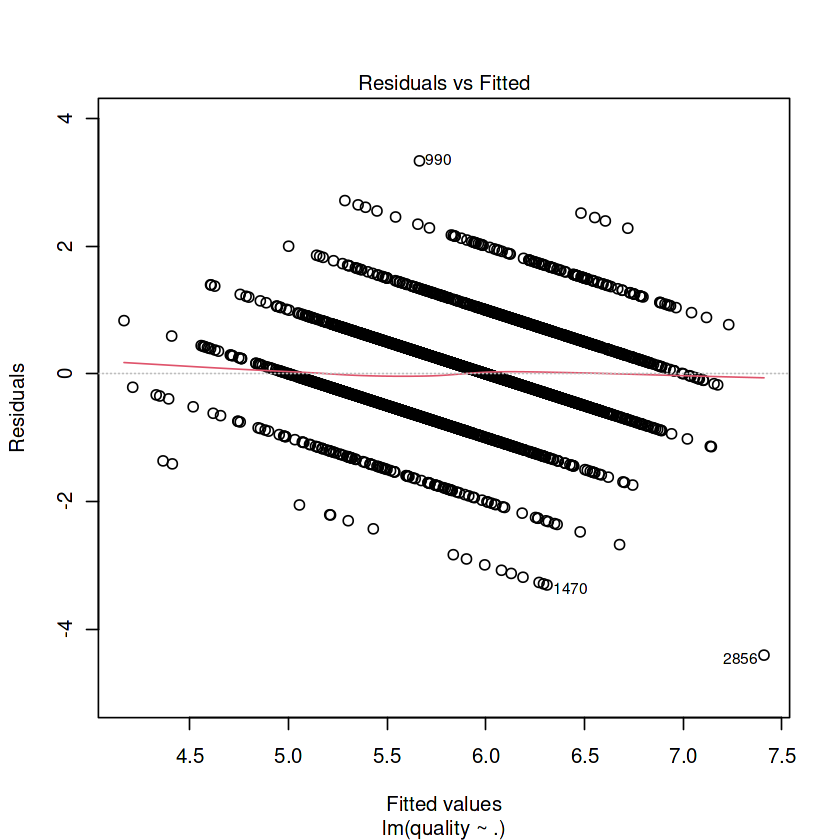

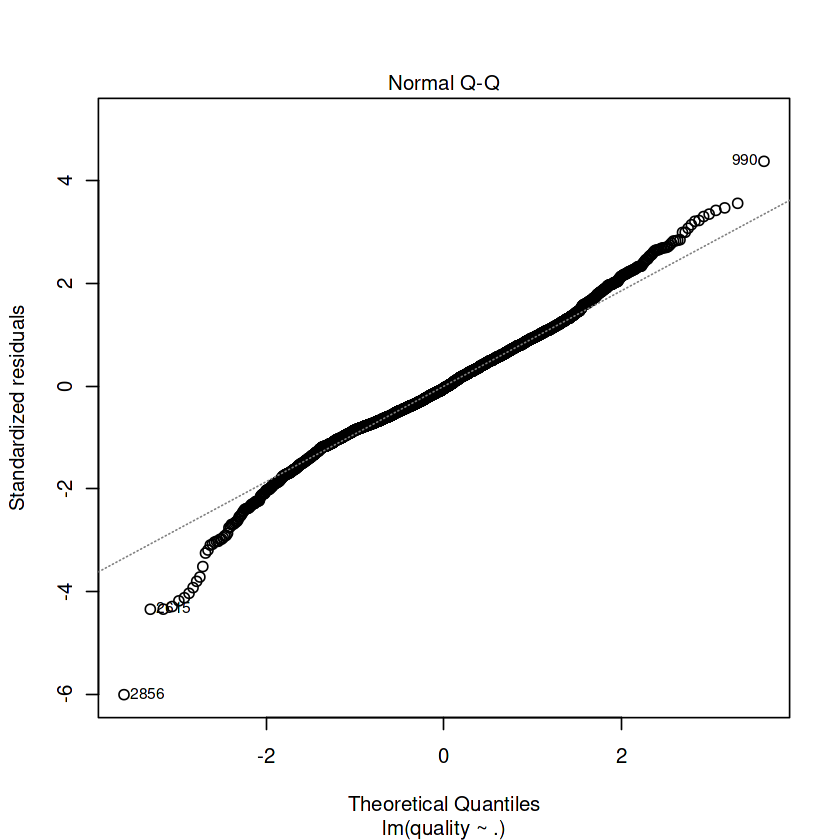

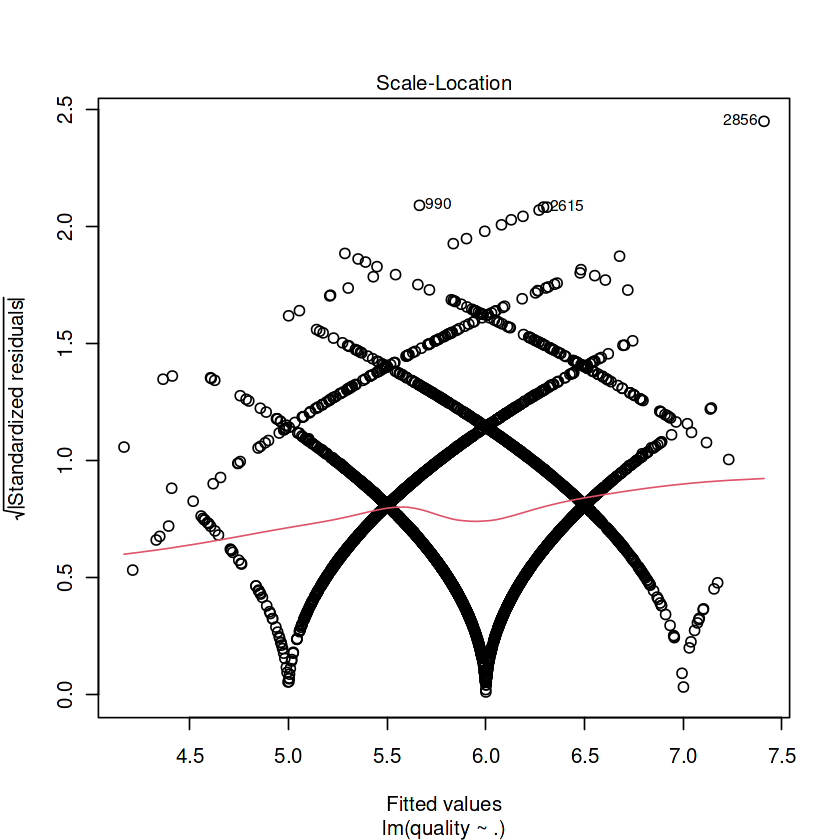

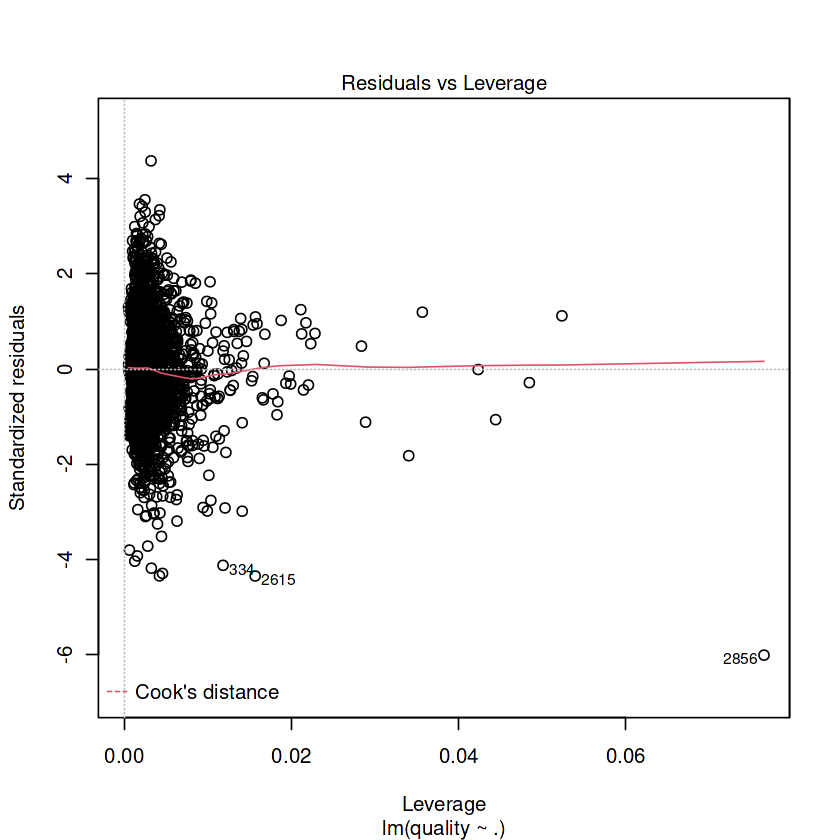

In [121]:
plot(wine.model)

In [164]:
compare<- result$prediction %>% as.data.frame()
compare<- cbind(compare,test_y)
names(compare)<-c("predict","actual")
head(compare)

,predict,actual
,<dbl>,<int>
1,5.599370,6
2,5.990896,6
3,6.081401,8
4,5.749744,6
5,5.711926,5
6,6.158747,6


`geom_smooth()` using formula = 'y ~ x'


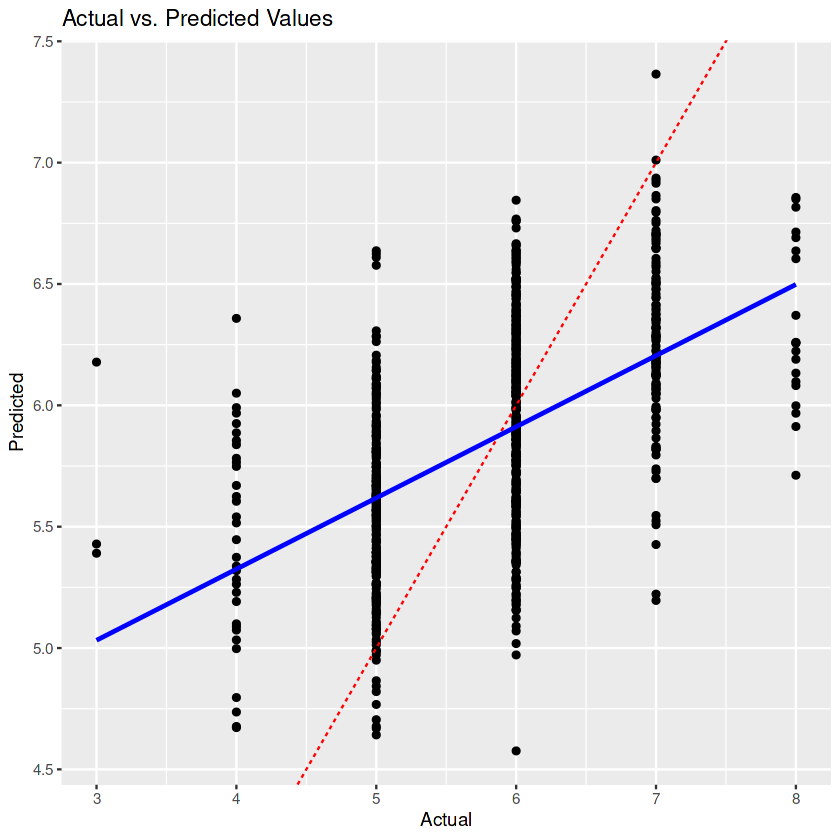

In [172]:
ggplot(data = compare, aes(x = actual, y = predict)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Actual vs. Predicted Values", x = "Actual", y = "Predicted")

In [173]:
# create a list of column names for both train and test sets
col_names <- colnames(train_x)
test_col_names <- colnames(test_x)

# make sure that the test set has the same columns as the train set
for (i in seq_along(col_names)) {
  if (!(col_names[i] %in% test_col_names)) {
    test_x[[col_names[i]]] <- 0
  }
}

# reorder the columns of the test set to match the order of the train set
test_x <- test_x[, colnames(train_x)]

# create matrices
train_x_mat <- as.matrix(train_x)
test_x_mat <- as.matrix(test_x)

# convert the response variable to a matrix
train_y_mat <- as.matrix(train_y)
test_y_mat <- as.matrix(test_y)

# perform cross-validation and fit the model
cv_model <- cv.glmnet(train_x_mat, train_y_mat, alpha = 1)
best_lambda <- cv_model$lambda.min
wine_model <- glmnet(train_x_mat, train_y_mat, alpha = 1, lambda = best_lambda)
predictions2 <- predict(wine_model, newx = test_x_mat)



In [176]:
compare<- cbind(compare, predictions2)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


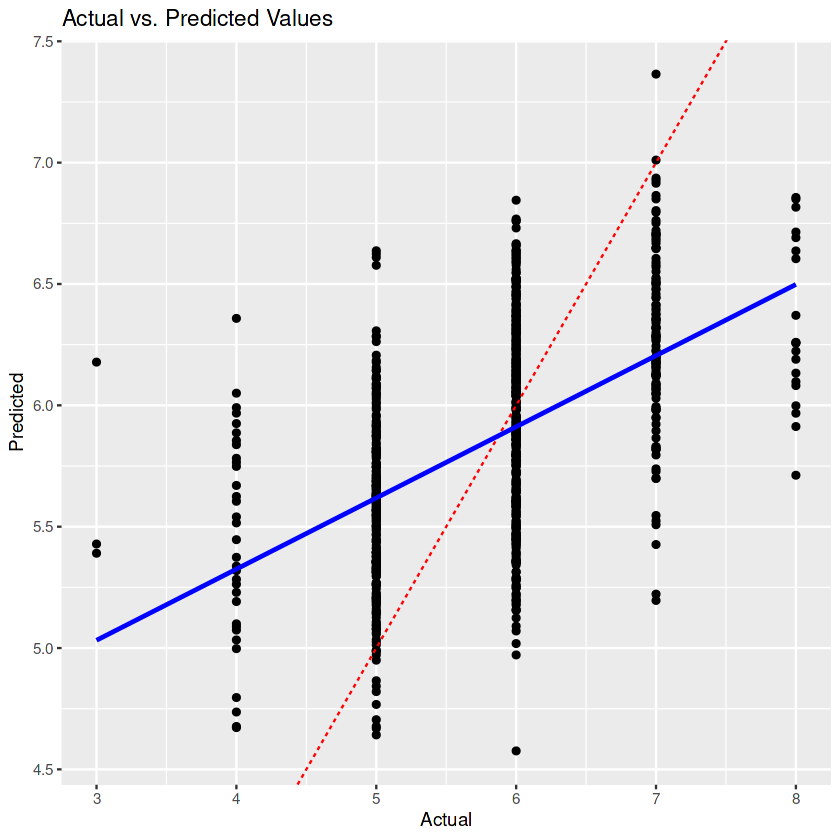

`geom_smooth()` using formula = 'y ~ x'


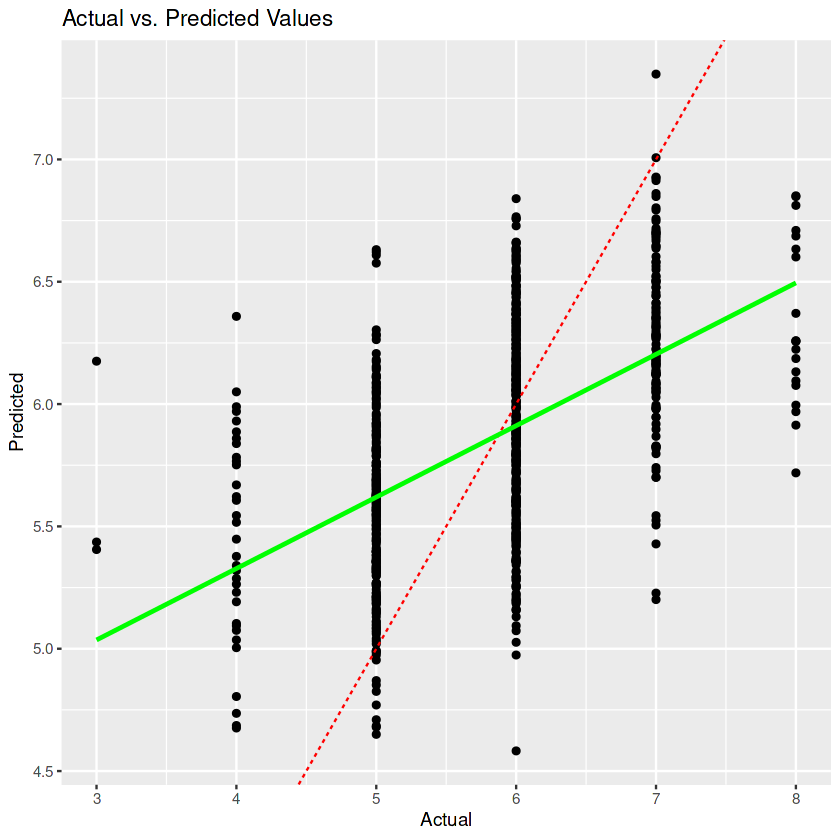

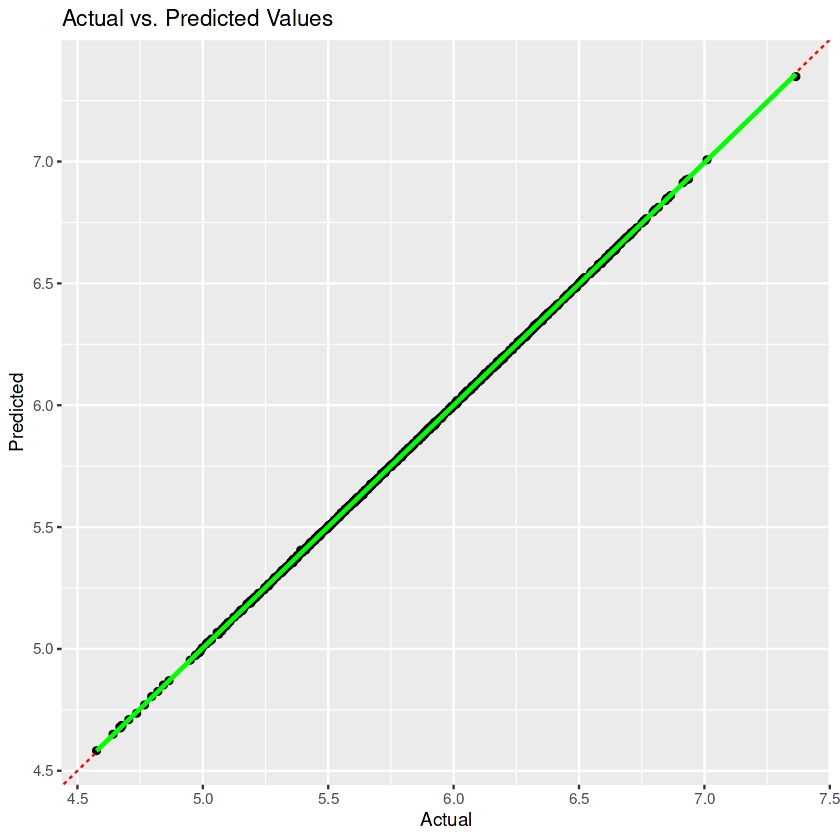

In [180]:
ggplot(data = compare, aes(x = actual, y = predict)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Actual vs. Predicted Values", x = "Actual", y = "Predicted")


ggplot(data = compare, aes(x = actual, y = predictions2,)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  geom_smooth(method = "lm", se = FALSE, color = "green") +
  labs(title = "Actual vs. Predicted Values", x = "Actual", y = "Predicted")
  
ggplot(data = compare, aes(x = predict, y = predictions2,)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  geom_smooth(method = "lm", se = FALSE, color = "green") +
  labs(title = "Actual vs. Predicted Values", x = "Actual", y = "Predicted")